In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
##### load the dataset training and testing Data
df_train = pd.read_csv('Data_Train.csv')

In [5]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
### Testing Data Sets
df_test = pd.read_csv('Test_set.csv')

In [7]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


##### We will predict Data for the Training set and try to get the better Accuracy


#### EDA(exploratory data analysis)

In [8]:
##### dataset information about datatype

df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

found all data set is in catagorical form
Date of journey ,dep_time,arrival time is in datetime type so have to convert them for better model

In [9]:
##### check the statistocal information of dataset
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


minium price is 1759 and maxprice is 79512

In [10]:
#### shape of datset
df_train.shape

(10683, 11)

10683 rows and 11 columns in datasets

In [11]:
##### find the null values presents in data sets
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

two missing value in datasets

In [12]:
#!pip install missingno

<function matplotlib.pyplot.show(close=None, block=None)>

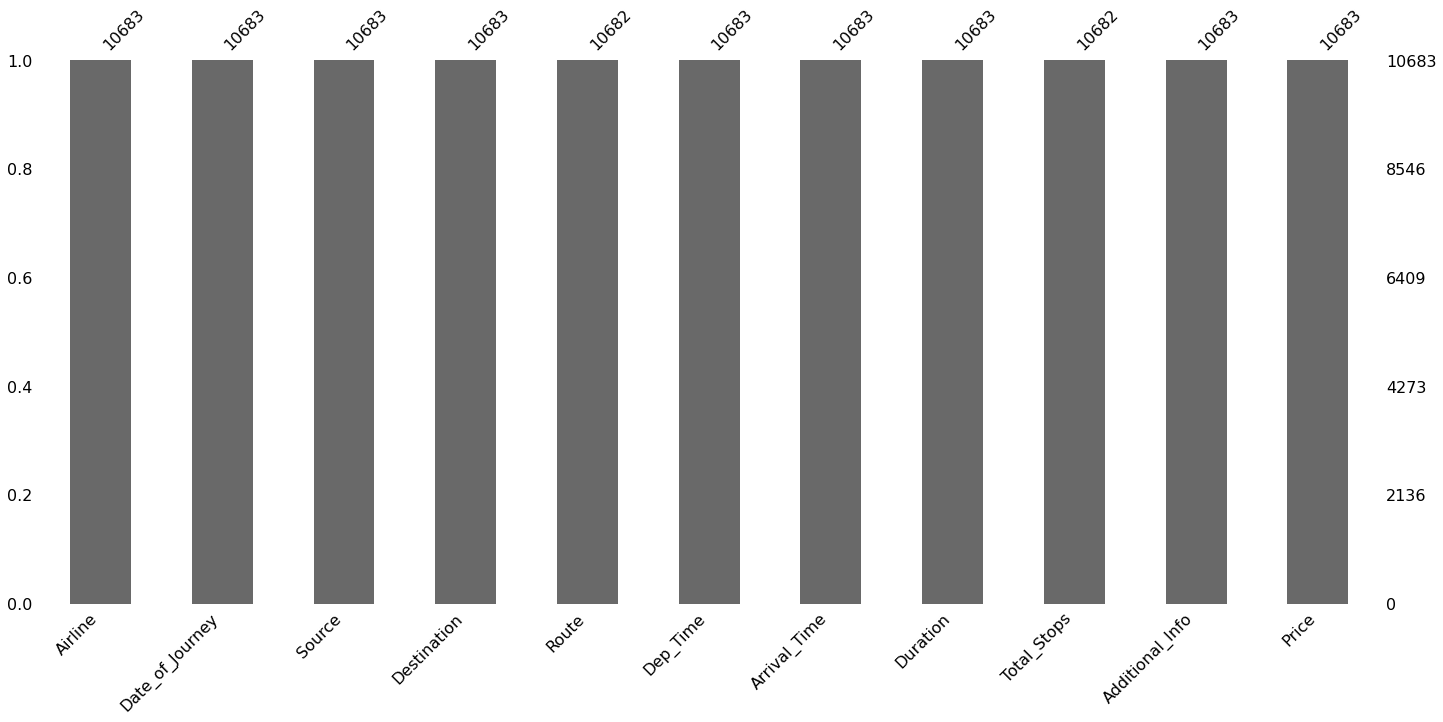

In [13]:
import missingno as msno
msno.bar(df_train)
plt.show

from graph it is clear to see that two missing value is in datasets
- > one in Routes
- > one in Additional Information

##### Data Clean 

found two missing value in dataset so if it can be drop becasue of very less missing value is in datasets

In [14]:
#drop the missing value
df_train.dropna(inplace=True)

In [15]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

##### create function to convert into date time datatypes

In [16]:
def change_into_datetime(col):
    df_train[col]=pd.to_datetime(df_train[col])

In [17]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [18]:
##### call the function with key to convert into datetime
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)
    

In [19]:
df_train.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [20]:
# Extract Date and Month from Data of journey
df_train['journey_day'] = df_train['Date_of_Journey'].dt.day

In [21]:
df_train['journey_month'] = df_train['Date_of_Journey'].dt.month

In [22]:
df_train.drop(['Date_of_Journey'],axis=1,inplace=True) ### drop the date of journey after extracting

In [23]:
##### craete Function to Extract Hours and Mins from columns like dep_time,Arrival_time

def extract_hrs(data,col):
    data[col+'_hrs'] = data[col].dt.hour

def extract_min(data,col):
    data[col+'mins'] = data[col].dt.minute
    

#### lastly drop the columns 
def dropColumns(data,col):
    data.drop(col,axis=1,inplace=True)

In [24]:
##### call the function to extract hrs from dep_time
extract_hrs(df_train,'Dep_Time')

In [25]:
##### call the function to extract min from dep_time
extract_min(df_train,'Dep_Time')

In [26]:
#### call function to drop the columns after extracting data
dropColumns(df_train,'Dep_Time')

In [27]:
##### call function to drop the hrs and min from arrival_time
extract_hrs(df_train,'Arrival_Time')
extract_min(df_train,'Arrival_Time')

In [28]:
#### call function to drop the columns after extracting data
dropColumns(df_train,'Arrival_Time')

In [29]:
df_train

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hrs,Dep_Timemins,Arrival_Time_hrs,Arrival_Timemins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,2h 30m,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU ? BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR ? DEL,2h 40m,non-stop,No info,12648,3,1,11,30,14,10


In [30]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_timedelta.html
s=pd.to_timedelta(df_train['Duration'])
s
df_train['Dur_hours']=s.dt.components['hours']
df_train['Dur_minutes']=s.dt.components['minutes']

In [31]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hrs,Dep_Timemins,Arrival_Time_hrs,Arrival_Timemins,Dur_hours,Dur_minutes
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [32]:
#### after extracting drop the duration columns from datasets
df_train.drop(['Duration'],axis=1,inplace=True)

In [33]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hrs,Dep_Timemins,Arrival_Time_hrs,Arrival_Timemins,Dur_hours,Dur_minutes
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [34]:
#### check the data type
df_train.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
journey_day          int64
journey_month        int64
Dep_Time_hrs         int64
Dep_Timemins         int64
Arrival_Time_hrs     int64
Arrival_Timemins     int64
Dur_hours            int64
Dur_minutes          int64
dtype: object

In [35]:
##### find the catagorical value
columns = [columns for columns in df_train.columns if df_train[columns].dtypes=='object']
columns

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [36]:
##### find the continous columns
count_col = [count_col for count_col in df_train.columns if df_train[count_col].dtypes!='object']
count_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hrs',
 'Dep_Timemins',
 'Arrival_Time_hrs',
 'Arrival_Timemins',
 'Dur_hours',
 'Dur_minutes']

##### handle the categorical columns with encoding techniques
#### Nominal data -- Data that are not in any order -->one hot encoding
##### ordinal data -- Data are in order --> labelEncoder

In [37]:
catagorical = df_train[columns]

In [38]:
catagorical

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU ? BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR ? DEL,non-stop,No info


In [39]:
catagorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

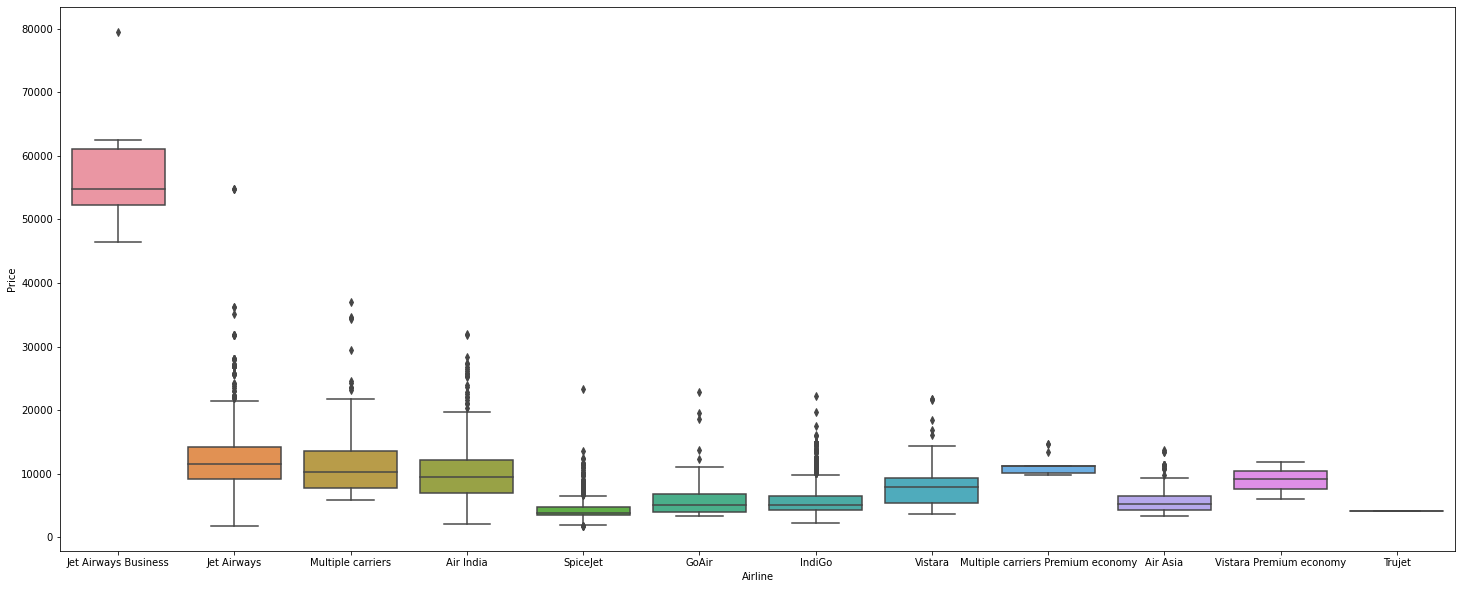

In [40]:
##### visualization ofAirlines with price
plt.figure(figsize=(25,10))
sns.boxplot(x='Airline',y='Price',data=df_train.sort_values('Price',ascending=False))

##### from the graph jet Airlines have max price from others

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

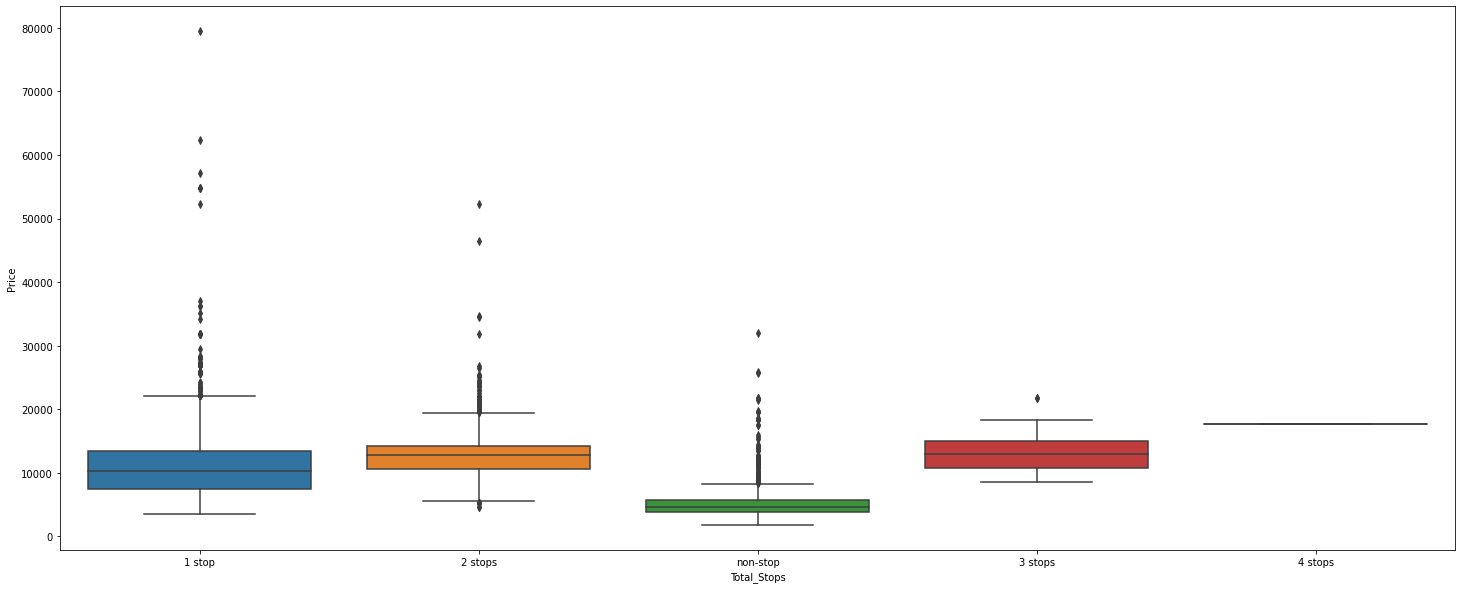

In [41]:
##### perform total_stop wise price
##### visualization ofAirlines with price
plt.figure(figsize=(25,10))
sns.boxplot(x='Total_Stops',y='Price',data=df_train.sort_values('Price',ascending=False))

In [42]:
##### Airline has nominal data so use one hot encoding
Airline =pd.get_dummies(catagorical['Airline'])

In [43]:
Airline

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0,0,0,0
10679,0,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,0,1,0


In [44]:
catagorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

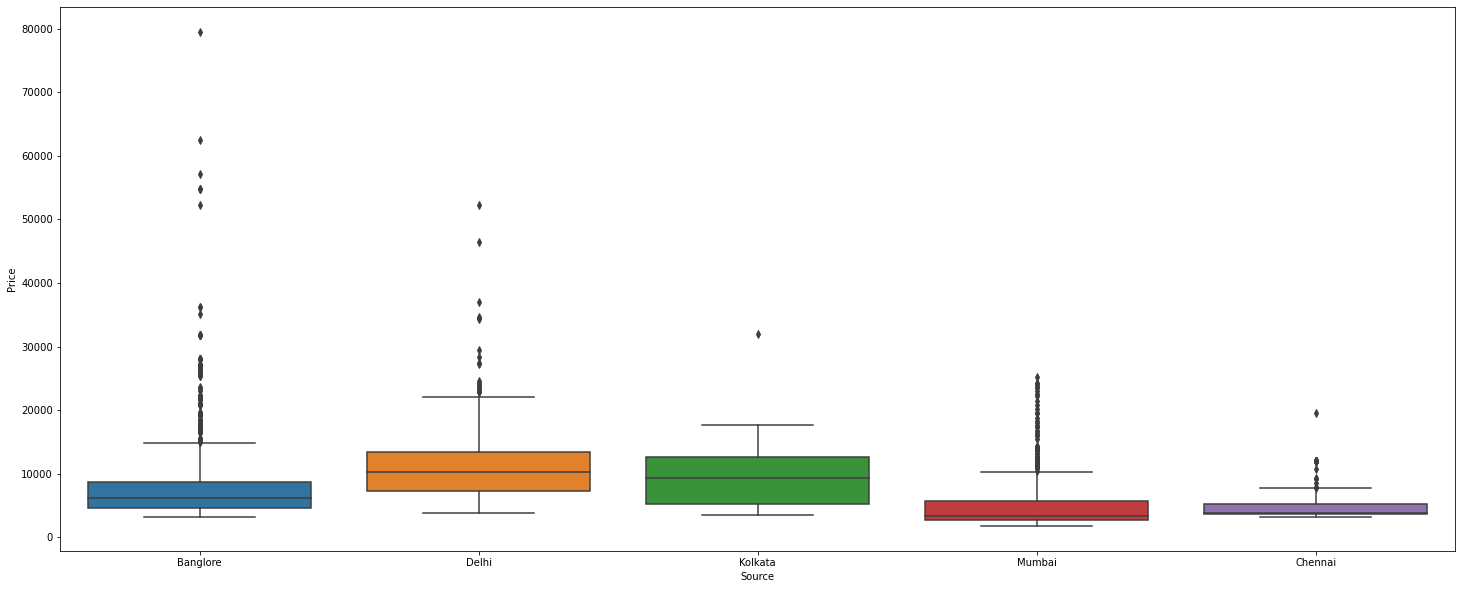

In [45]:
plt.figure(figsize=(25,10))
sns.boxplot(x='Source',y='Price',data=df_train.sort_values('Price',ascending=False))

##### souce delhi shows the price count more than other

In [46]:
##### Source is also nominal data apply one hot enconding
Source = pd.get_dummies(catagorical['Source'])

In [47]:
Source

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
10678,0,0,0,1,0
10679,0,0,0,1,0
10680,1,0,0,0,0
10681,1,0,0,0,0


In [48]:
catagorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

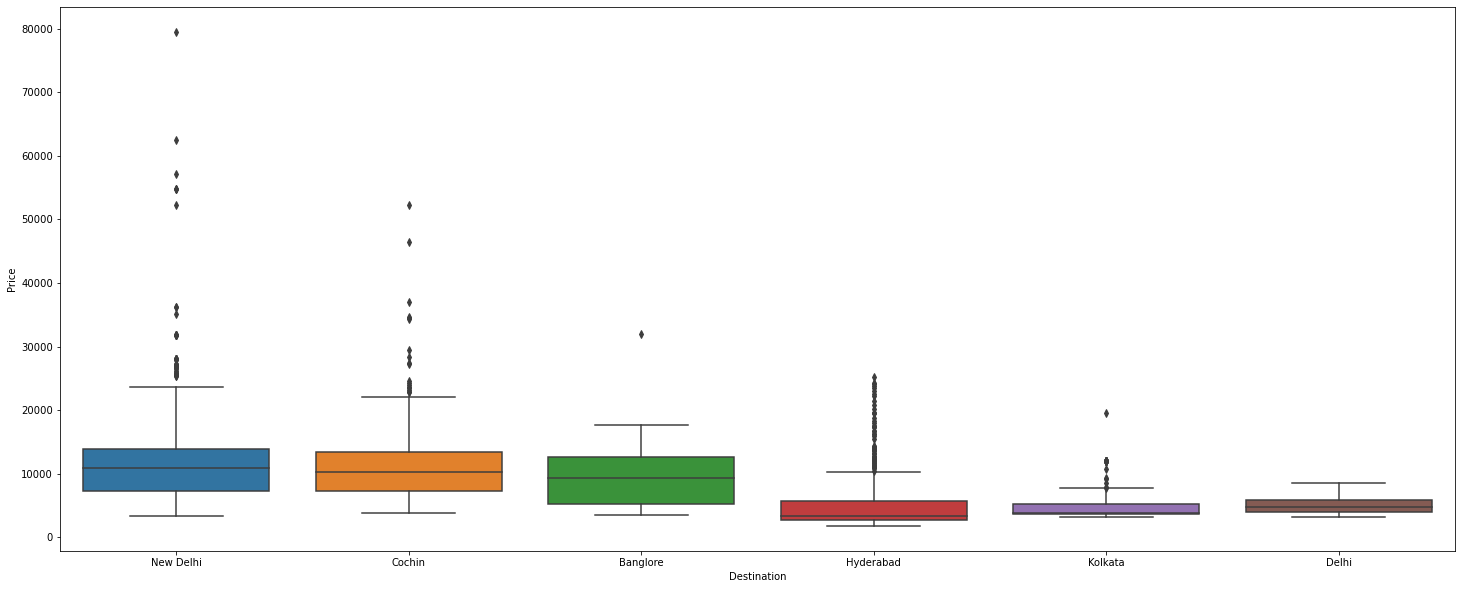

In [49]:
##### perform desitination wise price
plt.figure(figsize=(25,10))
sns.boxplot(x='Destination',y='Price',data=df_train.sort_values('Price',ascending=False))

In [50]:
##### Destination is also nominal Data apply one hot encoding tech
Destination = pd.get_dummies(catagorical['Destination'])

In [51]:
Destination

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
10678,1,0,0,0,0,0
10679,1,0,0,0,0,0
10680,0,0,1,0,0,0
10681,0,0,0,0,0,1


In [52]:
catagorical['Route'].value_counts()

DEL ? BOM ? COK                2376
BLR ? DEL                      1552
CCU ? BOM ? BLR                 979
CCU ? BLR                       724
BOM ? HYD                       621
                               ... 
CCU ? IXA ? BLR                   1
BLR ? HBX ? BOM ? AMD ? DEL       1
BOM ? RPR ? VTZ ? HYD             1
BOM ? NDC ? HYD                   1
BOM ? UDR ? DEL ? HYD             1
Name: Route, Length: 128, dtype: int64

In [53]:
##### lets split ? from Route and separate in different columns 
catagorical['Route1']=catagorical['Route'].str.split('?').str[0]

In [54]:
catagorical['Route2']=catagorical['Route'].str.split('?').str[1]
catagorical['Route3']=catagorical['Route'].str.split('?').str[2]
catagorical['Route4']=catagorical['Route'].str.split('?').str[3]
catagorical['Route5']=catagorical['Route'].str.split('?').str[4]

In [55]:
catagorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [56]:
##### from extract data Route lets drop the columns
catagorical.drop(['Route'],axis=1,inplace=True)

In [57]:
catagorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [58]:
###### check null value in catagorical columns
catagorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

<AxesSubplot:>

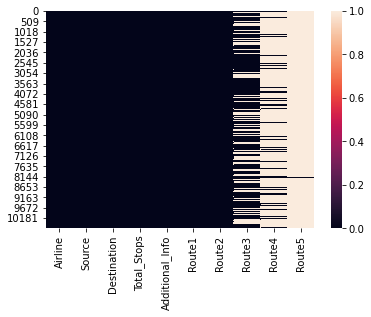

In [59]:
##### visualize null value in graph
sns.heatmap(catagorical.isnull())

In [60]:
#### Route 3 ,4 and 5 have missing value lets handle them carefully 
for i in ['Route3','Route4','Route5']:
    catagorical[i].fillna('None',inplace=True)

In [61]:
catagorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

##### No Missing value is now present

In [62]:
### lets encode total_stops
catagorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [63]:
dict = {'non-stop':0,'1 stop':1,'2 stops':2,
       '3 stops':3,'4 stops':4}

In [64]:
catagorical['Total_Stops'] = catagorical['Total_Stops'].map(dict)

In [65]:
catagorical

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1,No info,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,CCU,BLR,None,None,None
10679,Air India,Kolkata,Banglore,0,No info,CCU,BLR,None,None,None
10680,Jet Airways,Banglore,Delhi,0,No info,BLR,DEL,None,None,None
10681,Vistara,Banglore,New Delhi,0,No info,BLR,DEL,None,None,None


In [66]:
##### lets Apply label encoder on Routes columns
import sklearn
from sklearn.preprocessing import LabelEncoder

In [67]:
le=LabelEncoder()

In [68]:
for i in ['Route1','Route2','Route3','Route4','Route5']:
    catagorical[i]=le.fit_transform(catagorical[i])

In [69]:
catagorical

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,No info,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,2,5,29,13,5
10679,Air India,Kolkata,Banglore,0,No info,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,0,No info,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,0,No info,0,13,29,13,5


In [70]:
catagorical['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [71]:
##### drop the additional_information because additional information may not effect the price
catagorical.drop(['Additional_Info'],axis=1,inplace=True)

In [72]:
#### drop columns that has been encoded 
catagorical.drop(['Airline'],axis=1,inplace=True)
catagorical.drop(['Source'],axis=1,inplace=True)
catagorical.drop(['Destination'],axis=1,inplace=True)

In [73]:
catagorical

,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,0,0,13,29,13,5
1,2,2,25,1,3,5
2,2,3,32,4,5,5
3,1,2,34,3,13,5
4,1,0,34,8,13,5
...,...,...,...,...,...,...
10678,0,2,5,29,13,5
10679,0,2,5,29,13,5
10680,0,0,13,29,13,5
10681,0,0,13,29,13,5


In [74]:
##### lets concat the data for modeling
final_df = pd.concat([df_train[count_col],catagorical,Airline,Source,Destination],axis=1)

In [75]:
final_df

,Price,journey_day,journey_month,Dep_Time_hrs,Dep_Timemins,Arrival_Time_hrs,Arrival_Timemins,Dur_hours,Dur_minutes,Total_Stops,...,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,3897,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,7662,5,1,5,50,13,15,7,25,2,...,0,0,1,0,1,0,0,0,0,0
2,13882,6,9,9,25,4,25,19,0,2,...,0,1,0,0,0,1,0,0,0,0
3,6218,5,12,18,5,23,30,5,25,1,...,0,0,1,0,1,0,0,0,0,0
4,13302,3,1,16,50,21,35,4,45,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4107,4,9,19,55,22,25,2,30,0,...,0,0,1,0,1,0,0,0,0,0
10679,4145,27,4,20,45,23,20,2,35,0,...,0,0,1,0,1,0,0,0,0,0
10680,7229,27,4,8,20,11,20,3,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,12648,3,1,11,30,14,10,2,40,0,...,0,0,0,0,0,0,0,0,0,1


In [76]:
#### see all columns
pd.set_option('display.max_columns',38)
final_df.head()

,Price,journey_day,journey_month,Dep_Time_hrs,Dep_Timemins,Arrival_Time_hrs,Arrival_Timemins,Dur_hours,Dur_minutes,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,3897,24,3,22,20,1,10,2,50,0,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,7662,5,1,5,50,13,15,7,25,2,2,25,1,3,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,13882,6,9,9,25,4,25,19,0,2,3,32,4,5,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,6218,5,12,18,5,23,30,5,25,1,2,34,3,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,13302,3,1,16,50,21,35,4,45,1,0,34,8,13,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [77]:
##### check for the outliers in continous column
def check_outlier(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

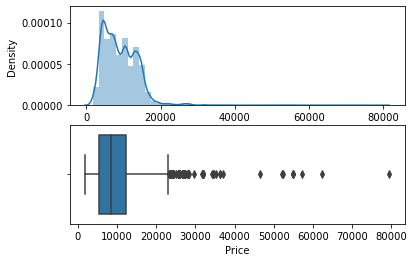

In [78]:
check_outlier(final_df,'Price')

In [79]:
##### found outliers in columns price
#### lets find median 
median = np.median(final_df['Price'])

In [80]:
median

8372.0

In [81]:
final_df['Price']=np.where(final_df['Price']>=40000,median,final_df['Price'])

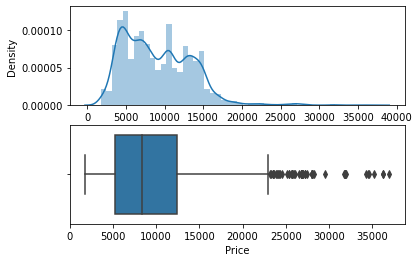

In [82]:
check_outlier(final_df,'Price')

In [83]:
final_df.shape ### new shape

(10682, 38)

In [84]:
df_train.shape 

(10682, 15)

##### Modeling of Data

In [85]:
#####separate the datasets in X and Y columns
y=final_df['Price']
x=final_df.drop('Price',axis=1)


In [86]:
x

,journey_day,journey_month,Dep_Time_hrs,Dep_Timemins,Arrival_Time_hrs,Arrival_Timemins,Dur_hours,Dur_minutes,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,24,3,22,20,1,10,2,50,0,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,5,1,5,50,13,15,7,25,2,2,25,1,3,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,6,9,9,25,4,25,19,0,2,3,32,4,5,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,5,12,18,5,23,30,5,25,1,2,34,3,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,3,1,16,50,21,35,4,45,1,0,34,8,13,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4,9,19,55,22,25,2,30,0,2,5,29,13,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10679,27,4,20,45,23,20,2,35,0,2,5,29,13,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10680,27,4,8,20,11,20,3,0,0,0,13,29,13,5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
10681,3,1,11,30,14,10,2,40,0,0,13,29,13,5,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1


In [87]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

#### Models

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
rf=RandomForestRegressor()
dtc = DecisionTreeRegressor()
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [91]:
maxAcc=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
   # print(f"At Random State {i},the tarining accuracy is :- ",{r2_score(y_train,pred_train)})
   # print(f"At Random State {i},the Test accuracy is :- ",{r2_score(y_test,pred_test)})
    accu = r2_score(y_test,pred_test)
    if accu>maxAcc:
        maxAcc=accu
        maxRs=i
print("Best accuracy -",maxAcc,'Best Random state = ',maxRs)

Best accuracy - 0.6370412098288281 Best Random state =  154


In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=39)

In [93]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is : {}'.format(ml_model))
    model = ml_model.fit(x_train,y_train)
    print("Training Score : {}".format(model.score(x_train,y_train)))
    predictions = model.predict(x_test)
    print("Predictions are : {}" ,format(predictions))
    print('\n')
    r2score = r2_score(y_test,predictions)
    print("r2 Score is : {}",format(r2score))
    print('Cross Validation Score: {}'.format(cross_val_score(ml_model,x_train,y_train,cv=5,scoring='r2')))
    print('MAE: {}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE: {}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
    
    sns.distplot(y_test-predictions)
    
    

In [94]:
from sklearn.neighbors import KNeighborsRegressor

Model is : RandomForestRegressor()
Training Score : 0.9542101012105946
Predictions are : {} [10500.385       9113.33733333  4837.05       ... 10237.62
  6074.76       18286.59942857]


r2 Score is : {} 0.8234018951473469
Cross Validation Score: [0.84073878 0.82246337 0.8329271  0.84819248 0.78443293]
MAE: 1147.7719097354318
MSE: 3371703.3513079747
RMSE: 1836.2198537506272


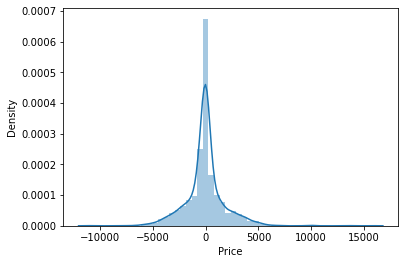

In [95]:
predict(RandomForestRegressor())

Model is : KNeighborsRegressor()
Training Score : 0.7766366814949717
Predictions are : {} [11699.4  9725.8  5589.4 ... 10565.8  5759.6 19361. ]


r2 Score is : {} 0.6589361387305733
Cross Validation Score: [0.62046108 0.63038794 0.64476159 0.61686624 0.61011372]
MAE: 1705.8356574637342
MSE: 6511769.5629386995
RMSE: 2551.8169140709724


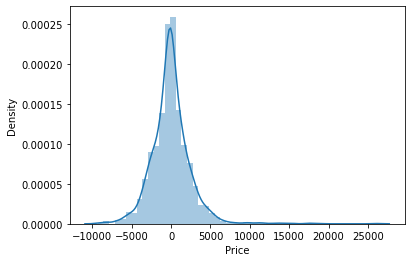

In [96]:
predict(KNeighborsRegressor())

Model is : GradientBoostingRegressor()
Training Score : 0.8014999089639074
Predictions are : {} [11865.82781699 10539.7786537   5212.96369859 ... 10905.22328644
  8266.39032505 17705.60248329]


r2 Score is : {} 0.8054190904691325
Cross Validation Score: [0.80122593 0.78651718 0.79817094 0.80389211 0.76569524]
MAE: 1389.5500763559005
MSE: 3715040.4604464993
RMSE: 1927.444022649296


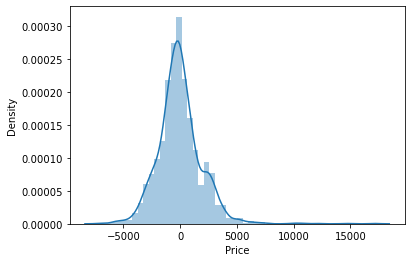

In [97]:
predict(GradientBoostingRegressor())

Model is : LinearRegression()
Training Score : 0.6134205165175483
Predictions are : {} [12177.27553088 12257.78035377  6627.98319522 ... 12575.42662472
  8900.48480013 15425.98423554]


r2 Score is : {} 0.6244969643402909
Cross Validation Score: [0.63139399 0.60750238 0.63008239 0.60366307 0.57781499]
MAE: 1891.7871865728005
MSE: 7169300.286752978
RMSE: 2677.554908261076


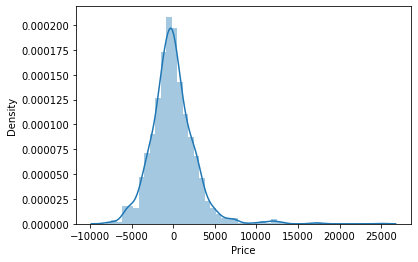

In [98]:
predict(LinearRegression())

Model is : DecisionTreeRegressor()
Training Score : 0.9673966664055752
Predictions are : {} [ 9663.  8938.  4668. ... 10151.  6810. 20694.]


r2 Score is : {} 0.7229302348404074
Cross Validation Score: [0.75729635 0.74399553 0.74647969 0.74984954 0.6982623 ]
MAE: 1306.9976992668849
MSE: 5289960.821007513
RMSE: 2299.9914828119504


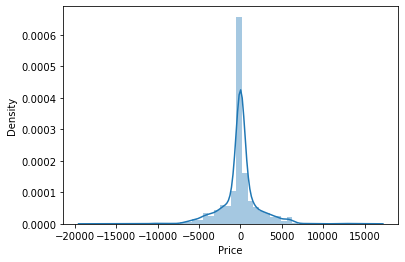

In [99]:
predict(DecisionTreeRegressor())

Model is : SVR()
Training Score : 0.03777212836710897
Predictions are : {} [8458.15733543 8402.5753949  7897.31302906 ... 8723.94576787 8472.26869598
 8544.61807182]


r2 Score is : {} 0.04956333862336004
Cross Validation Score: [0.01379091 0.04224358 0.02936153 0.02445283 0.01807327]
MAE: 3394.2241531397412
MSE: 18146233.670193512
RMSE: 4259.839629633199


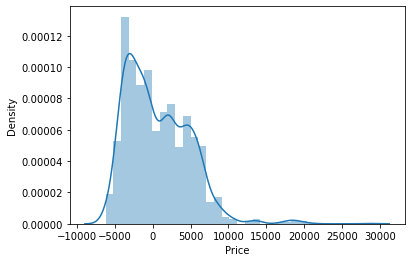

In [100]:
from sklearn.svm import SVR
predict(SVR())

In [101]:
from sklearn.ensemble import ExtraTreesRegressor

Model is : ExtraTreesRegressor()
Training Score : 0.967396305839944
Predictions are : {} [ 9663.     8938.     4979.85  ... 10315.78   6324.6   18376.505]


r2 Score is : {} 0.7842517969880575
Cross Validation Score: [0.80349908 0.78339083 0.80609814 0.81517941 0.76302089]
MAE: 1225.631592965216
MSE: 4119177.494803739
RMSE: 2029.5756932925017


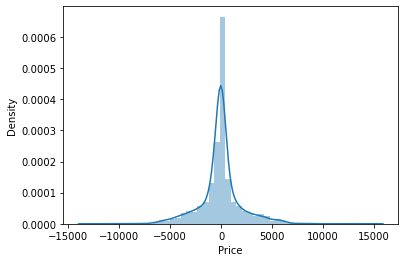

In [102]:
predict(ExtraTreesRegressor())

In [115]:
gdb = GradientBoostingRegressor()
gdb.fit(x_train,y_train)
pred_test=gdb.predict(x_test)
pred_train=gdb.predict(x_train)

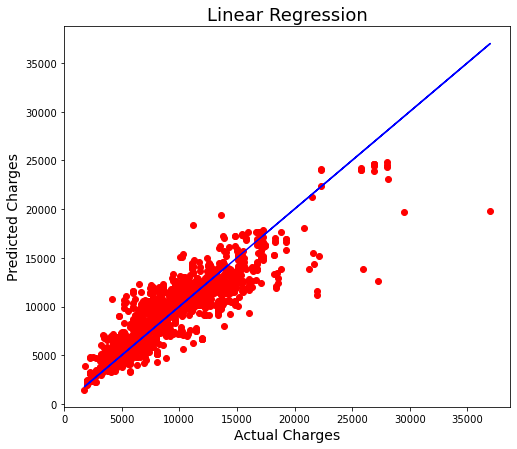

In [116]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Gredident Tres Regression',fontsize=18)
plt.show()

In [105]:
###### from above we know that best model is random forest lets hyper tune the score 

In [106]:
from sklearn.model_selection import RandomizedSearchCV

In [107]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [108]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(x_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 180, 'max_features': 'auto', 'max_depth': 15}

In [109]:
# best parameter
rf_random.best_params_

{'n_estimators': 180, 'max_features': 'auto', 'max_depth': 15}

In [ ]:
##### predicting the value
prediction = rf_random.predict(x_test)


In [ ]:
prediction

In [ ]:
r2_score(y_test,prediction)

In [ ]:
##### Accuracy has been Increased from hyper parameter tunning